In [245]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [246]:
data = pd.read_csv('tested.csv')
data.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Survived,0,1,0,0,1
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47.0,62.0,27.0,22.0
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7.0,9.6875,8.6625,12.2875


In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [248]:
data_dummy.head().T

,0,1,2,3,4
PassengerId,892.0,893.0,894.0,895.0,896.0
Survived,0.0,1.0,0.0,0.0,1.0
Pclass,3.0,3.0,2.0,3.0,3.0
Age,34.0,47.0,62.0,27.0,22.0
SibSp,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
Cabin_F4,0.0,0.0,0.0,0.0,0.0
Cabin_G6,0.0,0.0,0.0,0.0,0.0
Embarked_C,0.0,0.0,0.0,0.0,0.0
Embarked_Q,1.0,0.0,1.0,0.0,0.0


In [249]:
data.Age.fillna(value=data.Age.median(), inplace=True)
data.Age = data.Age.astype('int64')

data.drop([
    'PassengerId', 
    'Pclass', 
    'Name', 
    'SibSp', 
    'Parch', 
    'Ticket', 
    'Fare', 
    'Cabin', 
    'Embarked'], 
    inplace=True, axis=1
)

In [250]:
data.head().T

,0,1,2,3,4
Survived,0,1,0,0,1
Sex,male,female,male,male,female
Age,34,47,62,27,22


In [251]:
data = pd.get_dummies(data)

In [252]:
data.head().T

,0,1,2,3,4
Survived,0,1,0,0,1
Age,34,47,62,27,22
Sex_female,0,1,0,0,1
Sex_male,1,0,1,1,0


In [253]:
X = data.drop('Survived', axis=1)
y = data.Survived

In [335]:
X.columns

Index(['Age', 'Sex_female', 'Sex_male'], dtype='object')

In [316]:
knn = KNeighborsClassifier(n_neighbors=5)

In [317]:
knn.fit(X, y)

KNeighborsClassifier()

In [312]:
# X_test stould contains [age(int), sex_female(0/1), sex_male(0/1)]

In [327]:
age = 99
sex_female = 0
sex_male = 0

results = knn.predict(np.array([age, sex_female, sex_male]).reshape(1, -1)) # reshape(1, -1)
print('survived' if results == 1 else 'died')

survived


C:\Users\Yauheni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

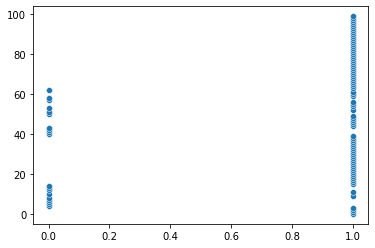

In [336]:
import matplotlib.pyplot as plt
import seaborn as sns

age = range(0, 100)
sex_female = 1
sex_male = 0

results = [knn.predict(np.array([[x, sex_female, sex_male]])) for x in age]

sns.scatterplot(results, age)

In [330]:
import pickle
##dump the model into a file
pickle.dump(knn, open("model.pkl", 'wb'))

In [332]:
model_knn_ = pickle.load(open('model.pkl', 'rb'))

In [333]:
age = 99
sex_female = 0
sex_male = 0

results = model_knn_.predict(np.array([age, sex_female, sex_male]).reshape(1, -1)) # reshape(1, -1)
print('survived' if results == 1 else 'died')

survived
